# Dataset Information
- Competition: https://www.kaggle.com/competitions/playground-series-s4e2/overview
- Origin Dataset: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
- Interesting: https://rstudio-pubs-static.s3.amazonaws.com/872760_24a044829eda4ba68996628b3a9efb06.html


- FAVC - Frequent consumption of high caloric food
- FCVC - Frequency of consumption of vegetables
- NCP - Number of main meals
- CAEC - Consumption of food between meals
- CH20 - Consumption of water daily
- SCC - Calories consumption monitoring
- FAF - Physical activity frequency
- TUE - Time using technology devices 
- CALC - Consumption of alcohol
- MTRANS - Transportation used    


NObesity values are:
- Insufficient_Weight Less than 18.5
- Normal_Weight 18.5 to 24.9
- Overweight_Level_I 25.0 to 29.9
- Overweight_Level_II I 30.0 to 34.9
- Obesity_Type_I II 35.0 to 39.9
- Obesity_Type_II more than 40

# Goal of the  of this competition
To use various factors to predict obesity risk in individuals, which is related to cardiovascular disease. Good luck!

# Submission
Estimate NObeyesdad for every id.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [116]:
# Load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_submission = pd.read_csv("sample_submission.csv")
df_obesity = pd.read_csv("ObesityDataSet.csv") # Original data 
df_train = pd.concat([df_train, df_obesity], axis =0)  # axis = 0 , needed for function concat, connect theses dataframes vertically together
df_train = df_train.drop_duplicates()
display(df_train.shape, df_train.head(), df_train.describe(include=[np.number]).T, df_train.describe(include=[object]).T, df_train.isna().sum())

(22845, 18)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.00
Age,22845.0,23.888513,5.755338,14.00,20.000000,22.815416,26.000000,61.00
Height,22845.0,1.700467,0.087865,1.45,1.631856,1.700000,1.763029,1.98
Weight,22845.0,87.793761,26.363367,39.00,66.000000,84.000000,111.531208,173.00
FCVC,22845.0,2.443675,0.533392,1.00,2.000000,2.393837,3.000000,3.00
NCP,22845.0,2.755837,0.711185,1.00,3.000000,3.000000,3.000000,4.00
CH2O,22845.0,2.027165,0.608479,1.00,1.755907,2.000000,2.531984,3.00
FAF,22845.0,0.984585,0.839728,0.00,0.015860,1.000000,1.600431,3.00
TUE,22845.0,0.620984,0.602802,0.00,0.000000,0.582840,1.000000,2.00


,count,unique,top,freq
Gender,22845,2,Female,11457
family_history_with_overweight,22845,2,yes,18736
FAVC,22845,2,yes,20826
CAEC,22845,4,Sometimes,19290
SMOKE,22845,2,no,22556
SCC,22845,2,no,22062
CALC,22845,4,Sometimes,16446
MTRANS,22845,5,Public_Transportation,18245
NObeyesdad,22845,7,Obesity_Type_III,4370


id                                2087
Gender                               0
Age                                  0
Height                               0
Weight                               0
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                                 0
SMOKE                                0
CH2O                                 0
SCC                                  0
FAF                                  0
TUE                                  0
CALC                                 0
MTRANS                               0
NObeyesdad                           0
dtype: int64

- Age is Min 14 years old and max is 61
- Sex is Male and Female
- Height 145cm - 197 cm
- Weight 39kg - 165kg

In [117]:
pd.set_option('display.max_columns', None)
df_train.head(50)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5.0,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6.0,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7.0,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8.0,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9.0,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

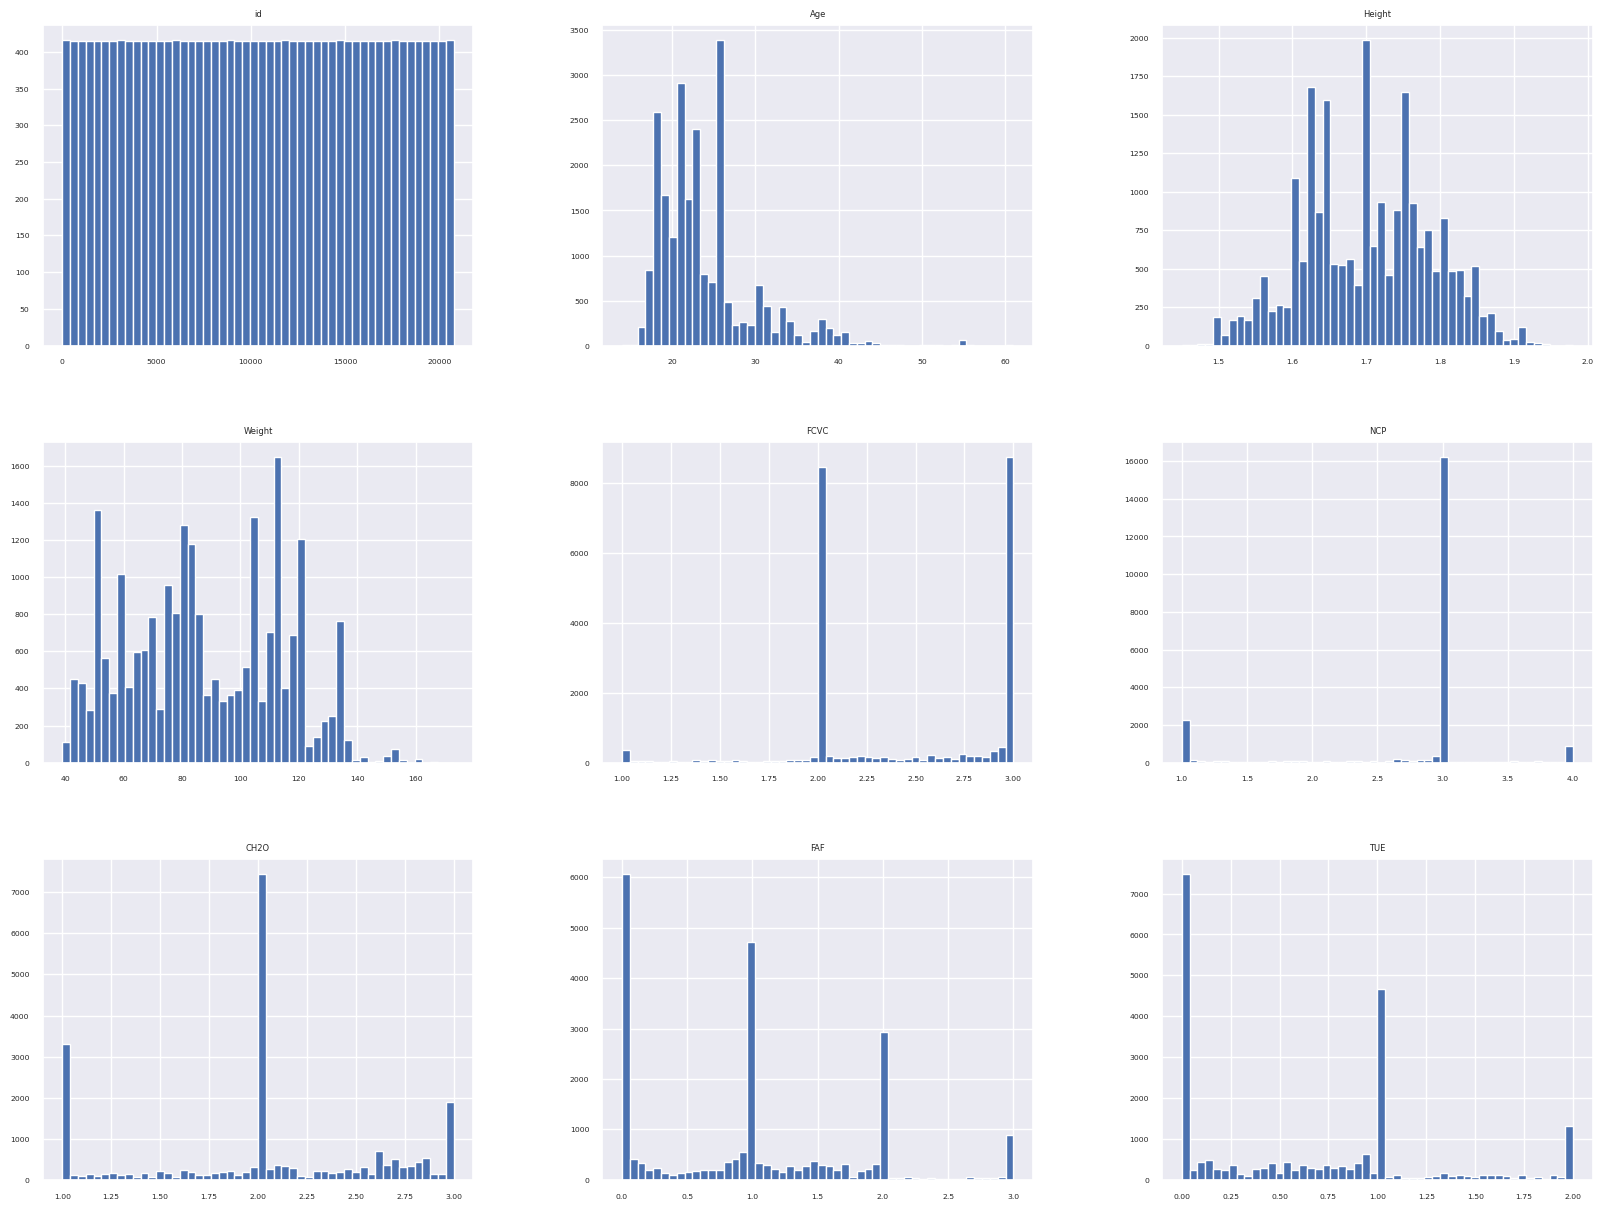

In [119]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

Feature Age could be scaled because of the slight left shift.

In [120]:
df_train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [121]:
df_train['NObeyesdad'].nunique

<bound method IndexOpsMixin.nunique of 0       Overweight_Level_II
1             Normal_Weight
2       Insufficient_Weight
3          Obesity_Type_III
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 22845, dtype: object>

In [122]:
df_train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


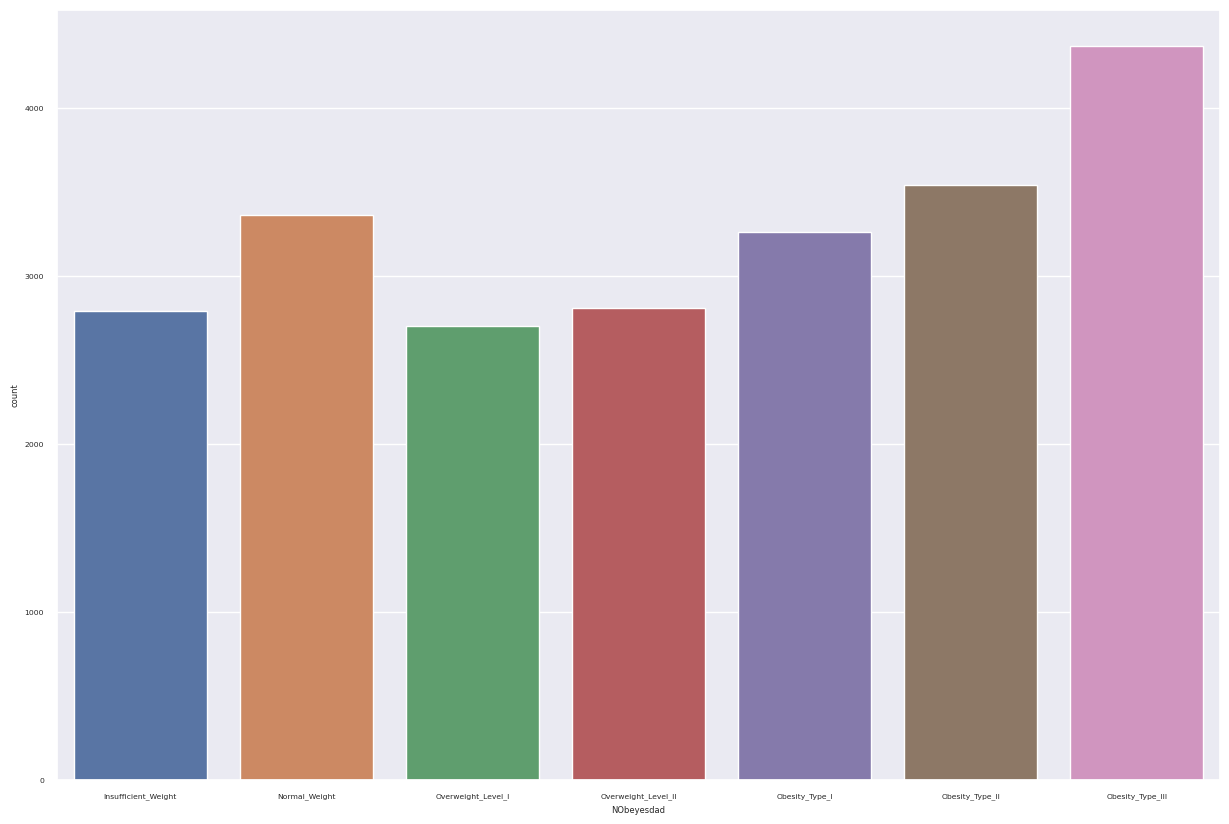

In [123]:
sns.set(font_scale=0.5)
plt.figure(figsize=(15, 10))
NObeyesdad_order= ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II' ,'Obesity_Type_III'] 
sns.countplot(data = df_train, x="NObeyesdad",order= NObeyesdad_order ) # There are not all even.
plt.show()

In [124]:
#df_train["NObeyesdad"].value_counts()["Normal_Weight"] # python exercise

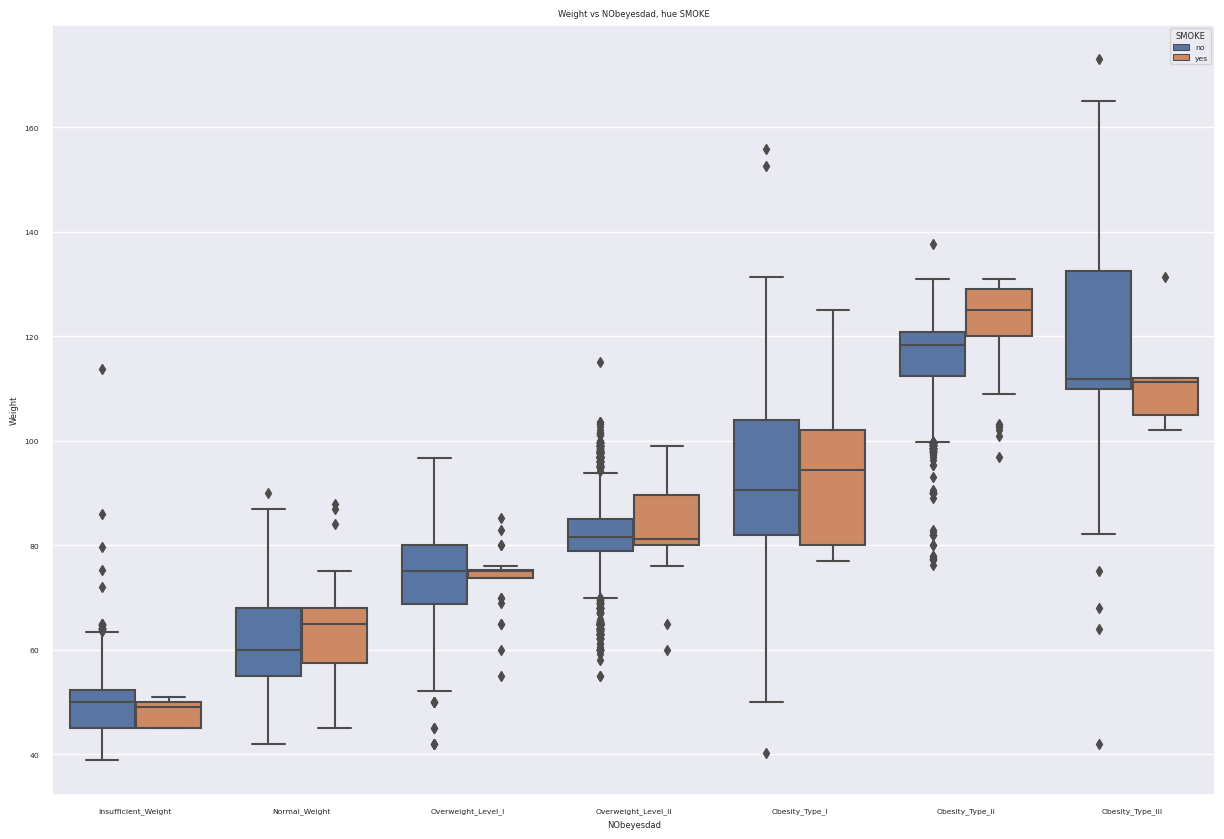

In [125]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Weight", x="NObeyesdad", hue="SMOKE", order=NObeyesdad_order)
plt.title("Weight vs NObeyesdad, hue SMOKE")
plt.show()

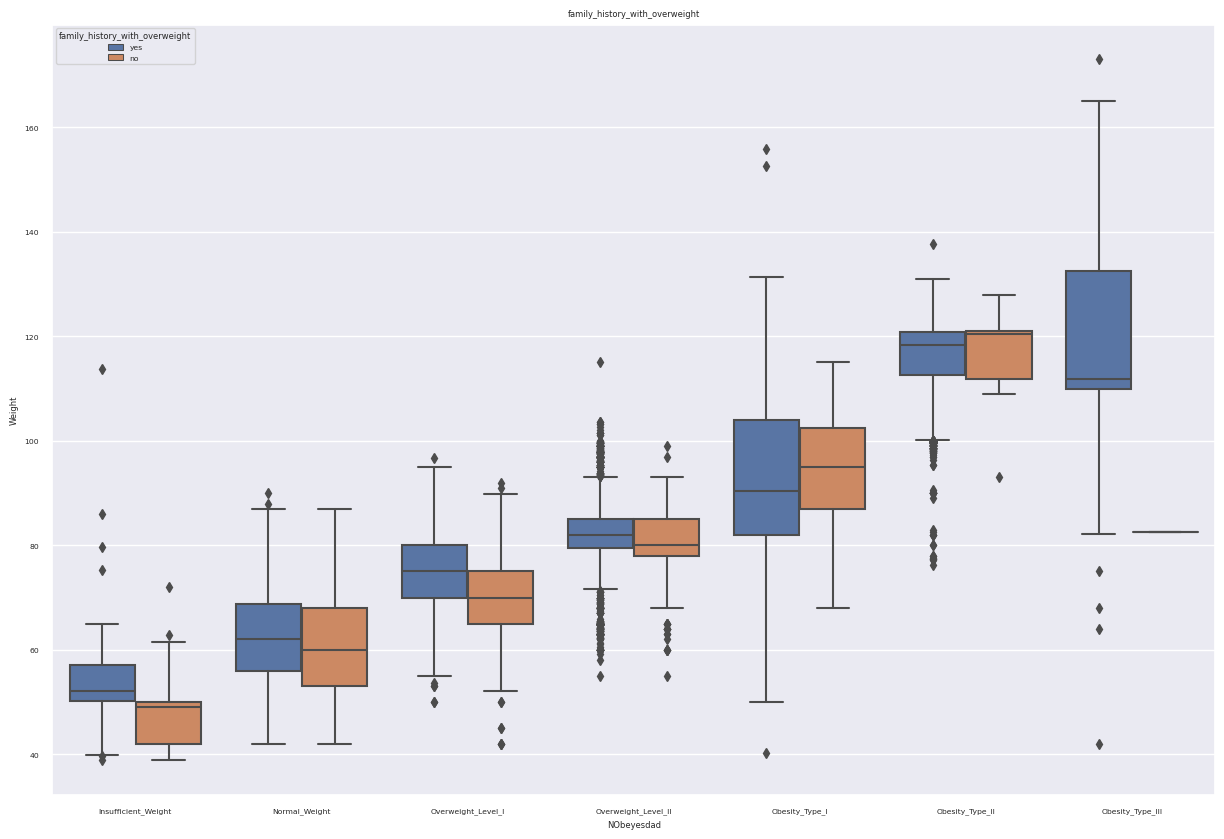

In [126]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Weight", x="NObeyesdad", hue="family_history_with_overweight", order=NObeyesdad_order)
plt.title("family_history_with_overweight")
plt.show()

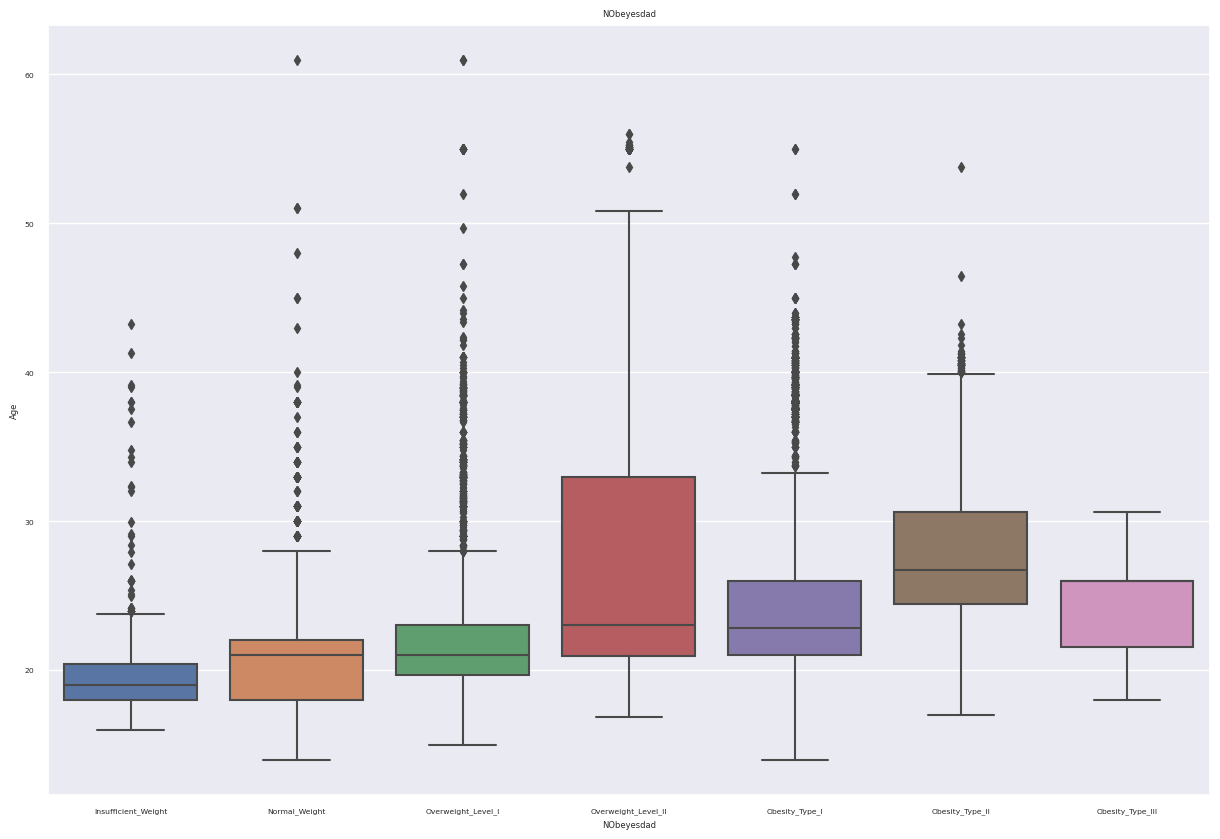

In [127]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", order=NObeyesdad_order)
plt.title("NObeyesdad")
plt.show()

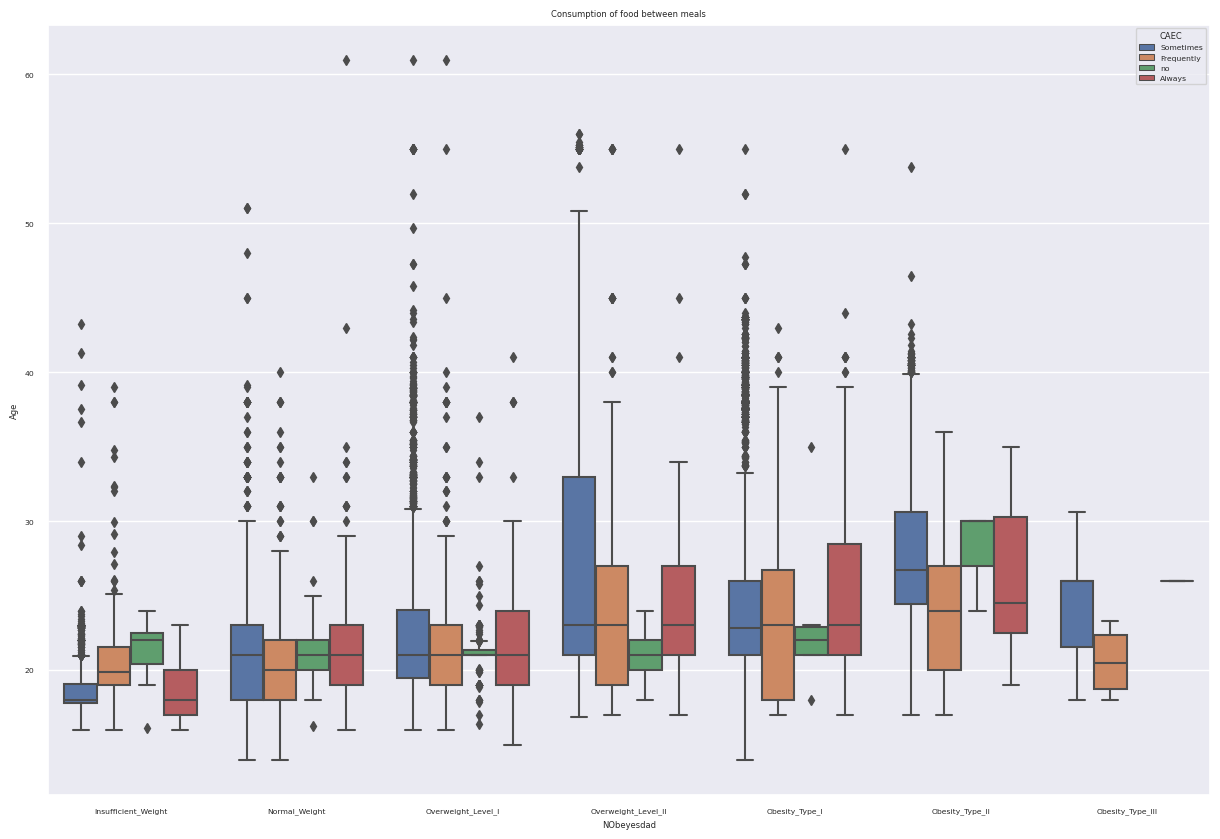

In [128]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", hue="CAEC", order=NObeyesdad_order)
plt.title("Consumption of food between meals")
plt.show()

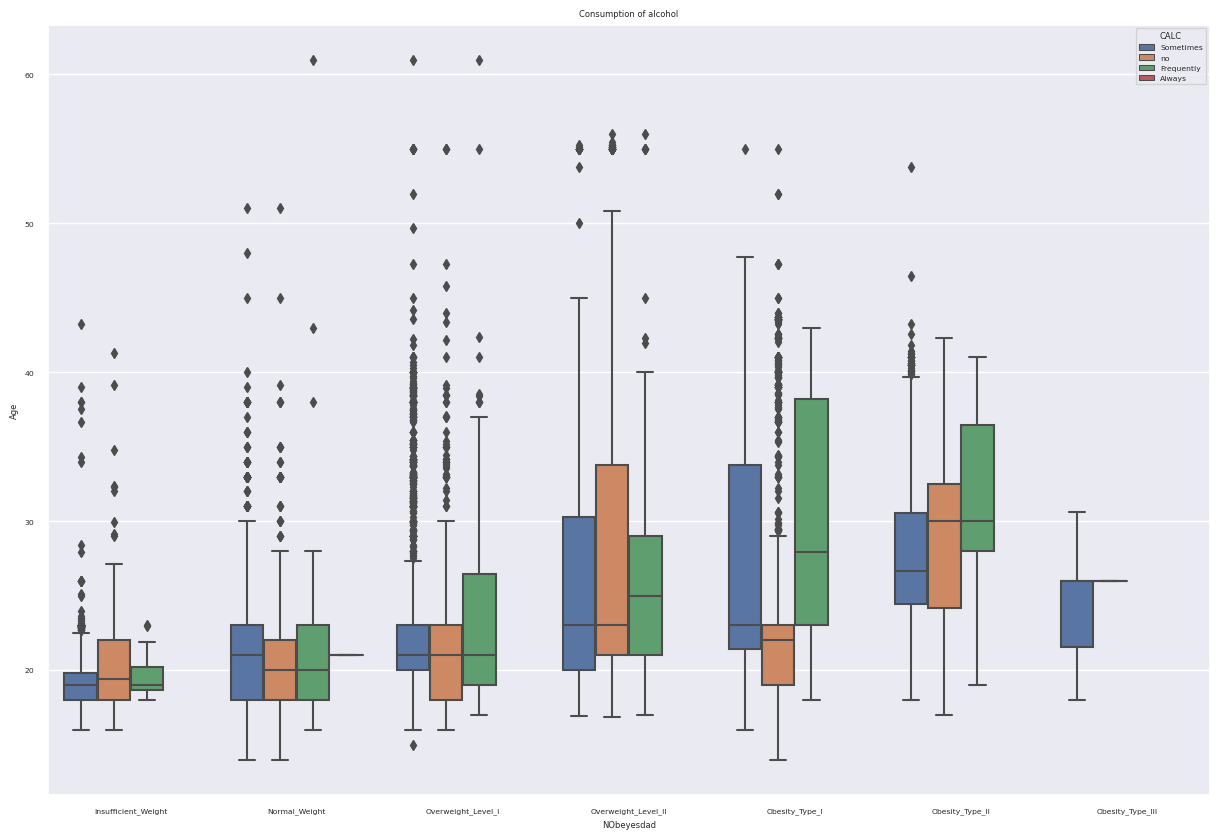

In [129]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", hue="CALC", order=NObeyesdad_order)
plt.title("Consumption of alcohol")
plt.show()

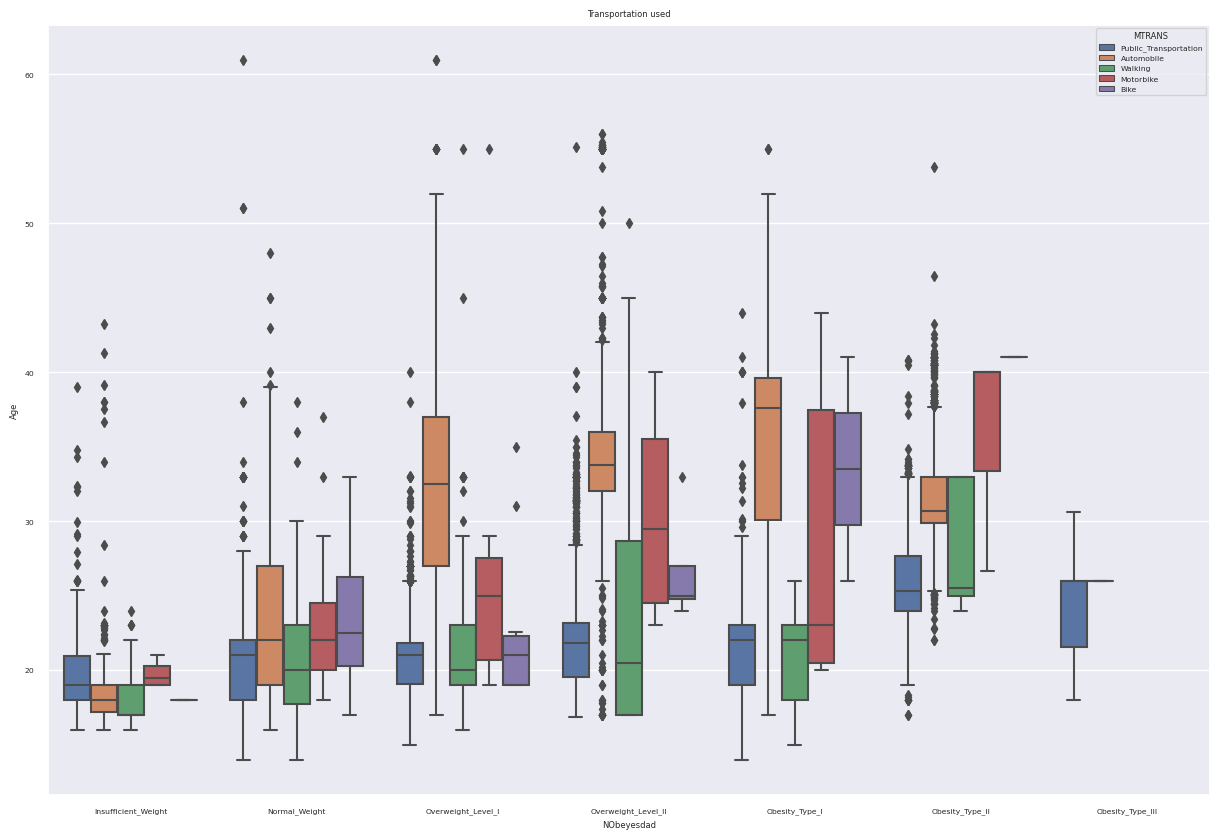

In [130]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", hue="MTRANS", order=NObeyesdad_order)
plt.title("Transportation used")
plt.show()

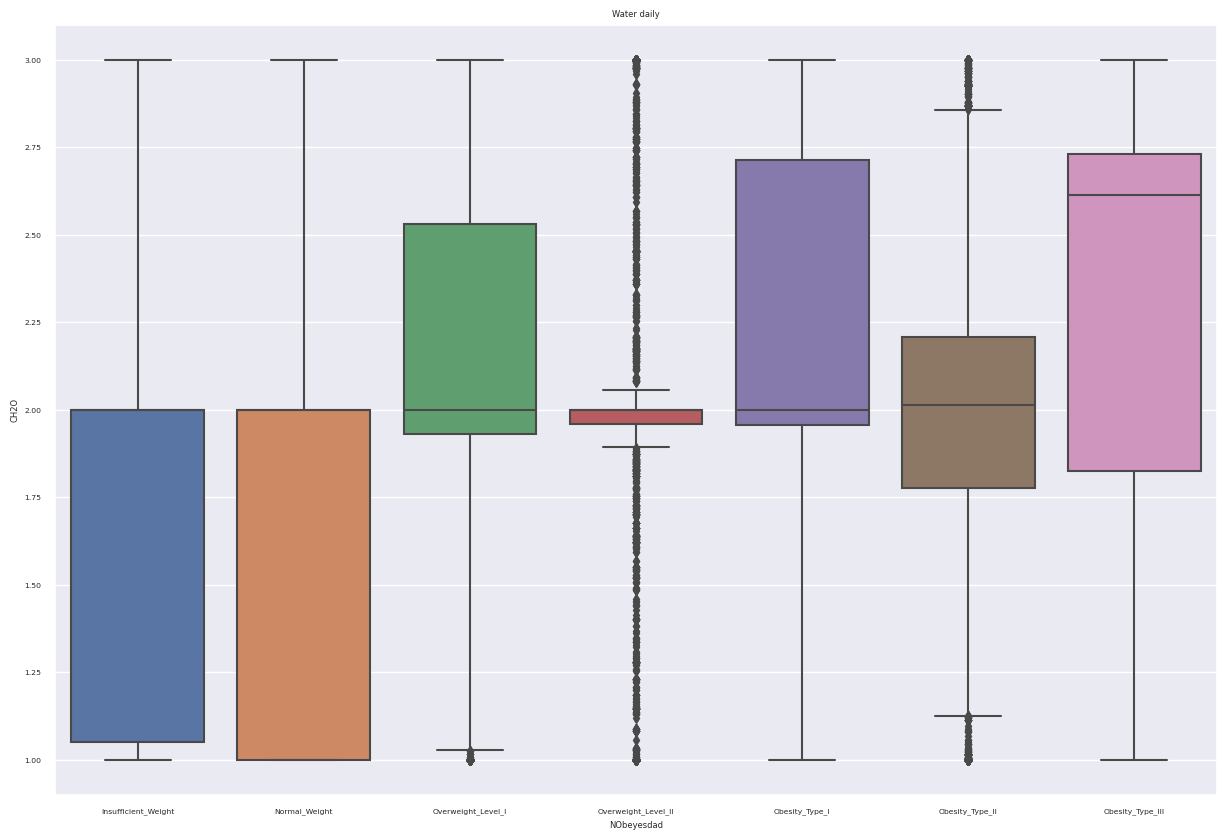

In [131]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="CH2O", x="NObeyesdad", order=NObeyesdad_order)
plt.title("Water daily")
plt.show()


# Corr Matrix

There are a high correlation to nObeyesdad:
- Age 
- Weight
- family_history_with_overweight
- CAEC, Consumption of foods between meals
- CH2O, Consumption of water daily (Not so much like the other)

In [132]:
df_train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


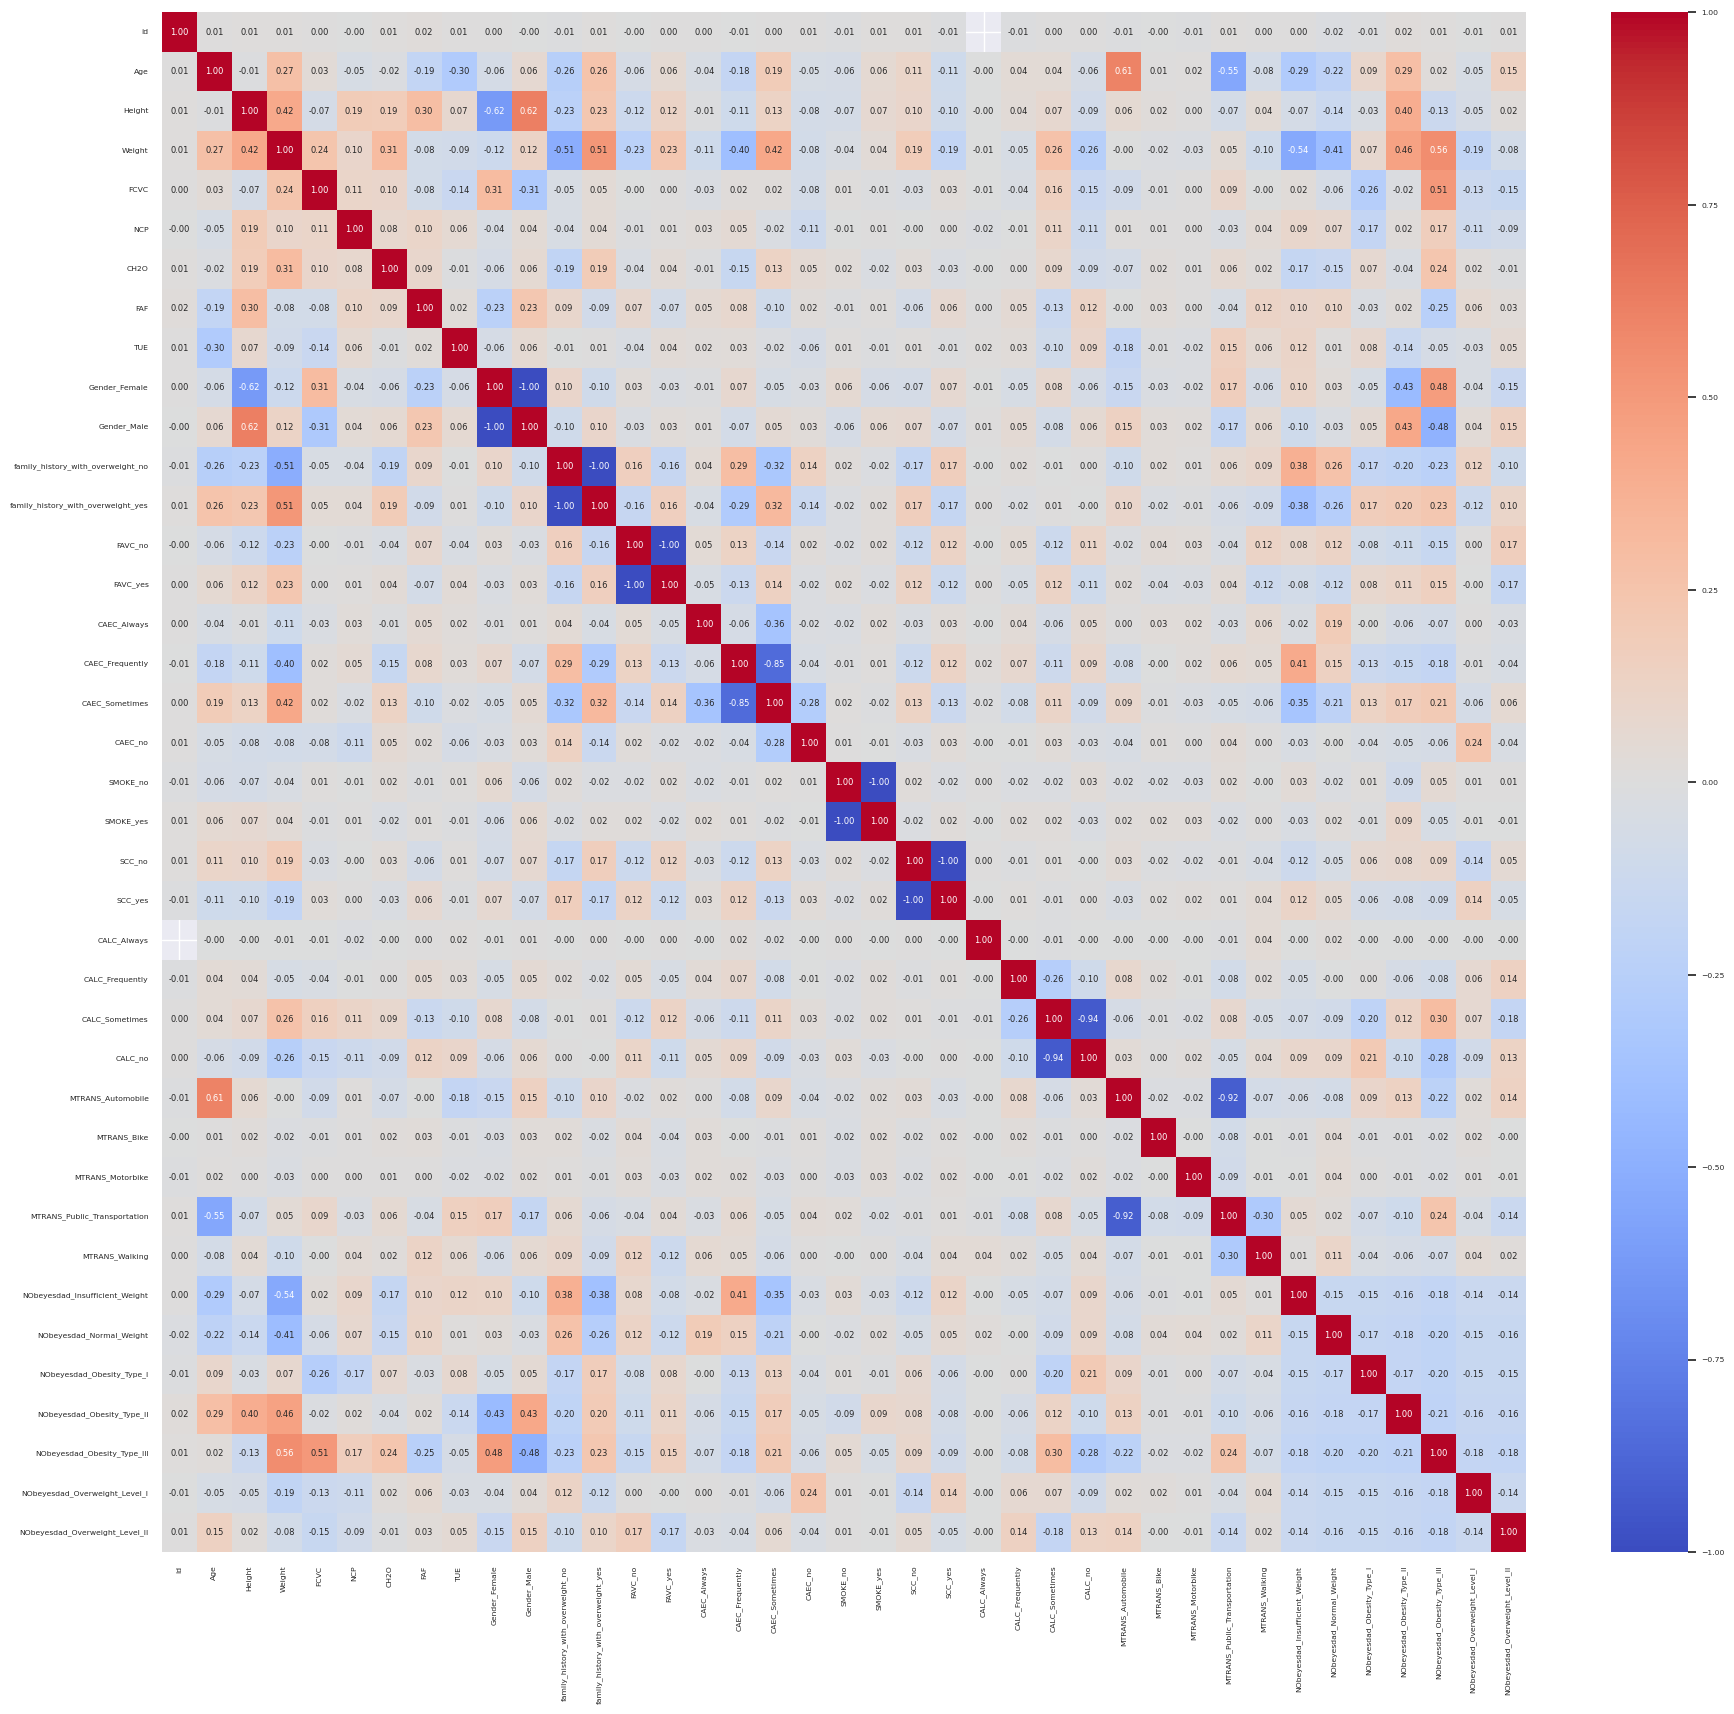

In [133]:
# big correlation matrix 
df_with_dummies = pd.get_dummies(df_train, columns=['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'])
corr_with_dummies = df_with_dummies.corr()
plt.figure(figsize=(22 , 20))
sns.heatmap(corr_with_dummies, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [134]:
#sns.pairplot(df_train)

# Data Cleaning

In [135]:
df_train.isnull().sum() # no missing values

id                                2087
Gender                               0
Age                                  0
Height                               0
Weight                               0
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                                 0
SMOKE                                0
CH2O                                 0
SCC                                  0
FAF                                  0
TUE                                  0
CALC                                 0
MTRANS                               0
NObeyesdad                           0
dtype: int64

In [136]:
#df_train[df_train.duplicated(keep='first')] # No duplicate

# Preprocessing

In [137]:
X_train, y_train = df_train.drop("NObeyesdad", axis=1), df_train["NObeyesdad"]
X_test = df_test



y_test = pd.DataFrame(columns=['NObeyesdad'])
#y_test['NObeyesdad'] = df_submission['NObeyesdad']


# Model selection

In [145]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

# Annahme: Sie haben bereits Ihre Daten geladen und vorverarbeitet
# X enthält die Features und y die entsprechenden Labels

# Definieren der Spaltennamen für kategorische und numerische Features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Aufteilen der Daten in Trainings- und Testsets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definieren der Pipelines für die Transformationen
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Kombinieren der Pipelines mit ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_features),
    ('num', numerical_pipeline, numerical_features)
])


"""
# Zusammenstellen des gesamten Pipelines für Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter-Raster für den Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
}

# GridSearchCV für den Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=2, n_jobs=-1)

# Trainieren des Random Forest Modells mit Cross-Validation
rf_grid_search.fit(X_train, y_train)

# Beste Parameter und beste Genauigkeit des Random Forest
print("Beste Parameter für Random Forest:", rf_grid_search.best_params_)
print("Beste Genauigkeit für Random Forest:", rf_grid_search.best_score_)

# Vorhersagen für den Testdatensatz mit Random Forest
rf_predictions = rf_grid_search.predict(X_test)

# Ausgabe der Vorhersagen für Random Forest
print("Random Forest Vorhersagen:", rf_predictions)

# Fehleranalyse für Random Forest
print("\nFehleranalyse für Random Forest:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix für Random Forest:")
print(confusion_matrix(y_test, rf_predictions))
"""
##############################



# Kodieren der Klassenlabels für XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Zusammenstellen des gesamten Pipelines für XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier())
])
# Beste Parameter für XGBoost: {'classifier__colsample_bytree': 0.5, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 4, 'classifier__n_estimators': 900, 'classifier__subsample': 0.9}
# Hyperparameter-Raster für XGBoost
xgb_param_grid = {
    'classifier__n_estimators': [ 800, 900,1000],
    'classifier__max_depth': [4],
    'classifier__learning_rate': [0.05],  # Hinzufügen von Lernraten
    'classifier__subsample': [ 0.9],  # Stichprobengröße für Bootstrapping
    'classifier__colsample_bytree': [0.5, 0.6]  # Feature-Subsampling-Rate pro Baum
}

# GridSearchCV für XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=2, n_jobs=-1)

# Trainieren des XGBoost-Modells mit Cross-Validation
xgb_grid_search.fit(X_train, y_train_encoded)

# Beste Parameter und beste Genauigkeit für XGBoost
print("\nBeste Parameter für XGBoost:", xgb_grid_search.best_params_)
print("Beste Genauigkeit für XGBoost:", xgb_grid_search.best_score_)

# Vorhersagen für den Testdatensatz mit XGBoost
xgb_predictions_encoded = xgb_grid_search.predict(X_test)

# Dekodieren der Vorhersagen für XGBoost
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

# Ausgabe der Vorhersagen für XGBoost
print("XGBoost Vorhersagen:", xgb_predictions)

# Fehleranalyse für XGBoost
print("\nFehleranalyse für XGBoost:")
print(classification_report(y_train, xgb_predictions))
print("Confusion Matrix für XGBoost:")
print(confusion_matrix(y_train, xgb_predictions))



Beste Parameter für XGBoost: {'classifier__colsample_bytree': 0.5, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 4, 'classifier__n_estimators': 1000, 'classifier__subsample': 0.9}
Beste Genauigkeit für XGBoost: 0.9093458291831293
XGBoost Vorhersagen: ['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']

Fehleranalyse für XGBoost:


ValueError: Found input variables with inconsistent numbers of samples: [22845, 13840]

In [144]:
y_train

0       Overweight_Level_II
1             Normal_Weight
2       Insufficient_Weight
3          Obesity_Type_III
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 22845, dtype: object

In [89]:
print("\nBeste Parameter für XGBoost:", xgb_grid_search.best_params_)


Beste Parameter für XGBoost: {'classifier__colsample_bytree': 0.5, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 4, 'classifier__n_estimators': 900, 'classifier__subsample': 0.9}


In [88]:
xgb_predictions

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [85]:
y_test

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Normal_Weight
4,Normal_Weight
...,...
13835,Normal_Weight
13836,Normal_Weight
13837,Normal_Weight
13838,Normal_Weight


In [81]:
y_test_encoded = label_encoder.fit_transform(y_test)

/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
y_test_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
xgb_predictions_encoded

array([3, 5, 4, ..., 0, 1, 3])

In [80]:
y_test

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Normal_Weight
4,Normal_Weight
...,...
13835,Normal_Weight
13836,Normal_Weight
13837,Normal_Weight
13838,Normal_Weight


In [83]:
# Beste Parameter und beste Genauigkeit für XGBoost
print("\nBeste Parameter für XGBoost:", xgb_grid_search.best_params_)
print("Beste Genauigkeit für XGBoost:", xgb_grid_search.best_score_)


# Fehleranalyse für XGBoost
print("\nFehleranalyse für XGBoost:")
print(classification_report(y_test_encoded, xgb_predictions_encoded))
#print("Confusion Matrix für XGBoost:")
#print(confusion_matrix(y_test, xgb_predictions))


Beste Parameter für XGBoost: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Beste Genauigkeit für XGBoost: 0.9090954822502552

Fehleranalyse für XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22     13840
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.12     13840
   macro avg       0.14      0.02      0.03     13840
weighted avg       1.00      0.12      0.22     13840



/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
print(xgb_predictions)
df_submission['NObeyesdad'] = xgb_predictions
df_submission.to_csv('submission.csv', index=False)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [ ]:
df_submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
